In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()
Base.prepare(engine)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()


('2017-08-23',)

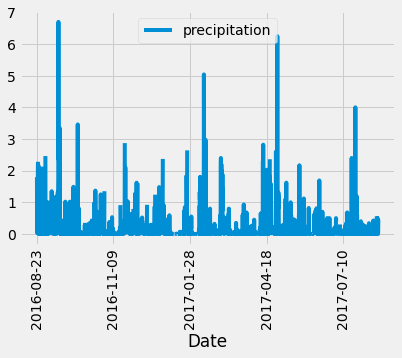

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
year_back_date = most_recent_date - dt.timedelta(days=365)

# Perform a query to retrieve the date and precipitation scores

measurement_query = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= year_back_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
measurement_df = pd.DataFrame(measurement_query, columns = ['Date', 'precipitation']).sort_values(by='Date')

# Use Pandas Plotting with Matplotlib to plot the data

measurement_df.plot(x="Date", y="precipitation", rot = 90)


In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measurement_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
num_stations = session.query(station.station).order_by(station.station).count()
num_stations


9

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

query = sqlalchemy.select([
measurement.station,
sqlalchemy.func.count(measurement.station)
]).group_by(measurement.station).order_by(func.count(measurement.station).desc())

result = engine.execute(query).fetchall()

result 


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

session.query(func.max(measurement.tobs),func.min(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()


[(85.0, 54.0, 71.66378066378067)]

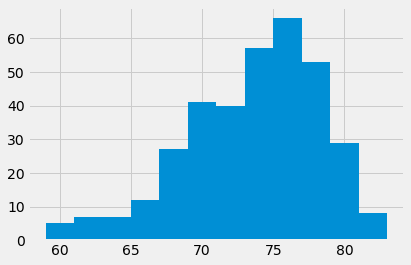

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_query = session.query(measurement.tobs, measurement.date).\
    filter(measurement.station == 'USC00519281', measurement.date >= year_back_date).all()

temp_df = pd.DataFrame(temp_query, columns = ['Temp', 'Date']).sort_values(by='Date')

plt.hist(temp_df["Temp"], bins = 12)
plt.show()


# Close session

In [17]:
# Close Session
session.close()